<a href="https://colab.research.google.com/github/Benbuk/GOMYCODE_DS_Bootcamp/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Classification
## Objective

What You're Aiming For

In this checkpoint, we are going to work on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

##Instructions

1. Import you data and perform basic data exploration phase

>* Display general information about the dataset

>* Create a pandas profiling reports to gain insights into the dataset

>* Handle Missing and corrupted values

>* Remove duplicates, if they exist

>* Handle outliers, if they exist

>* Encode categorical features

2. Select your target variable and the features
3. Split your dataset to training and test sets
4. Based on your data exploration phase select a ML classification algorithm and train it on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

# 1.0 Importing Libraries and dataset

## 1.1 Libraries

In [1]:
#importing the needed libraries
!pip install pandas-profiling #install Ydata Profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ydata_profiling as ydp # Import the Ydata_profiling library that have been installed
import profile # Imports profile for creating html or notebook from ydata_profiling results
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=65ca4d894ee7b1dd629d3332a85dd4ebeb0f116e8ddc414f94b545a137a21d48
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

## 1.2 Dataset importation

In [2]:
African_crisis = pd.read_csv('/content/African_crises_dataset.csv')

# 2.0 Data Exploration




## 2.1 Understanding the Data Structure
The dataset contains 1058 rows with zero missing value.

In [3]:
African_crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
African_crisis.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
#check for null values in the dataframe
African_crisis.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

## 2.2 Exploring data using Ydata profiling

In [10]:
#Creates a Ydata profile to explore and understand the relationship between the variables
Africa_crisis_DataProfile = ProfileReport(African_crisis, title = "African Banking Crisis")

#Generates the profile
Africa_crisis_DataProfile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.3 Encoding Categorical Variable
The "banking_crisis" datatype is object and categorical variable, so, it is converted using LabelEncoder.

In [7]:
# Transform 'counter_type' feature to a numeric variable (example: using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
African_crisis['banking_crisis'] = LabelEncoder().fit_transform(African_crisis['banking_crisis'])

## 2.4 Selecting Features that might be relevant to the model

In [8]:
#selecting columns
African_crisis_model_data = African_crisis.loc[:, ~African_crisis.columns.isin(['country_number', 'country_code', 'country', 'year'])]

In [58]:
#Dataframe
African_crisis_model_data

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1054,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,0,361.900000,1,1,0.0,3.720000,1,0,0,1


## 2.5 Creating a heatmap
The heatmap revealed a strong positive correlation between systemic crisis and banking crisis while other variables have weak positive correlation with systemic crisis.

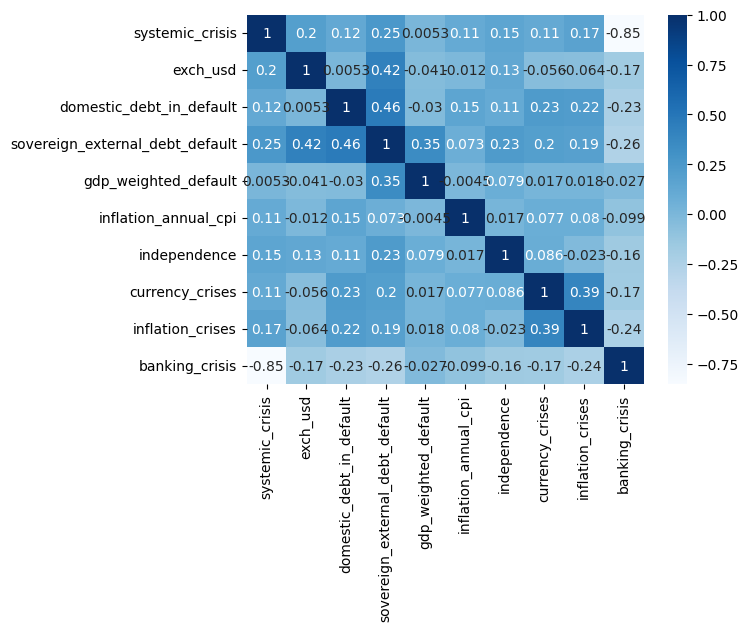

In [11]:
# compute correlation matrix
corr = African_crisis_model_data.corr()

# plot heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

# show plot
plt.show()

2.6 Using a histogram to understand the distribution of values in each feature. From the result, most of the variables in the dataset have been mapped to 1 and 0.

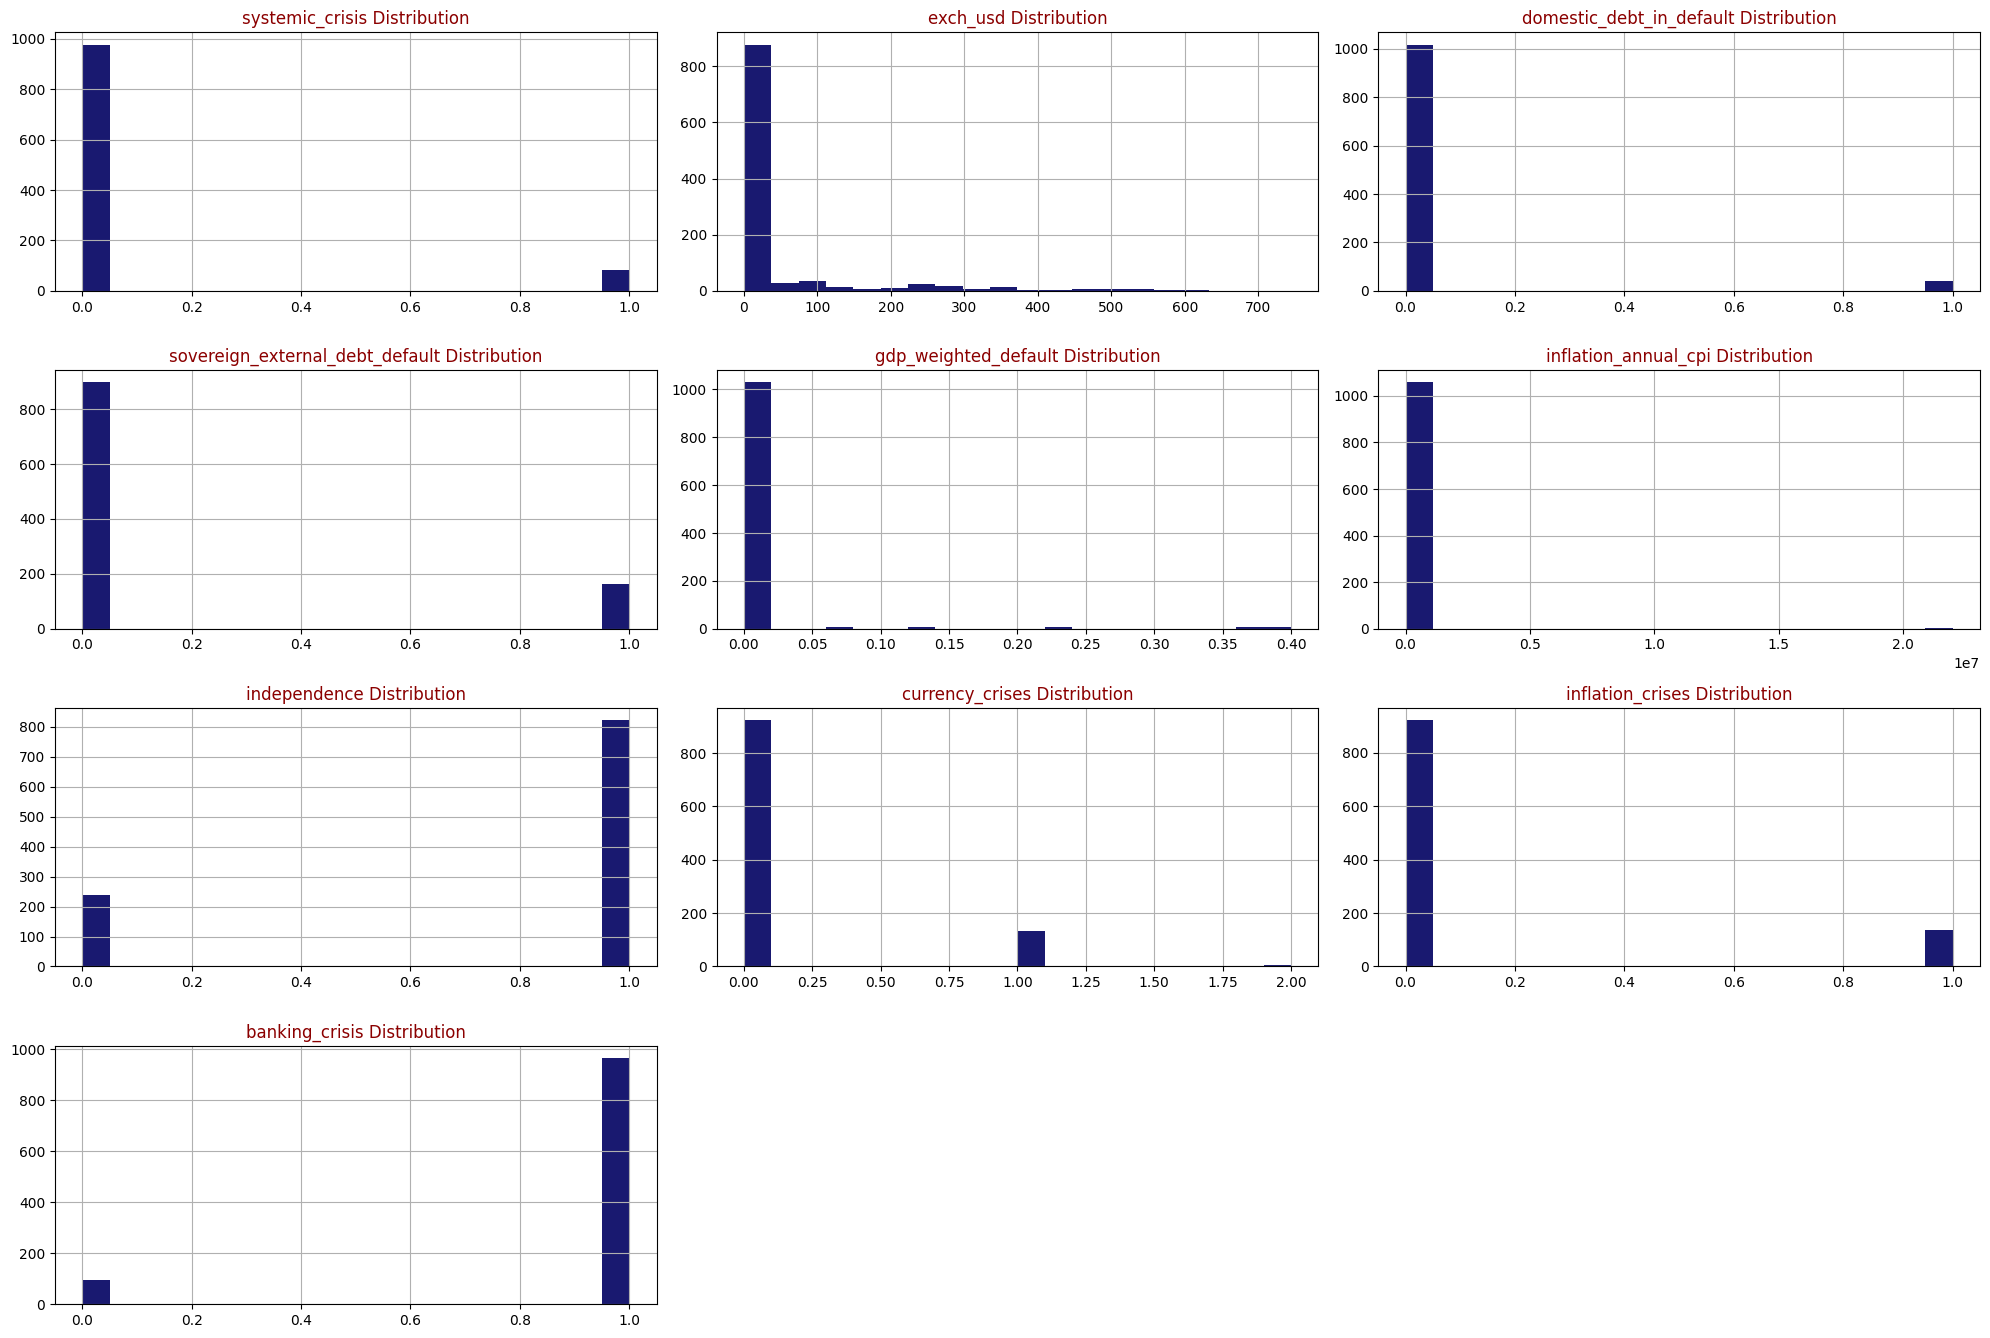

In [59]:
#histogram
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(African_crisis_model_data,African_crisis_model_data.columns,6,3)

#3.0 Running the Models


## 3.1 Logistics Regression Model


### 3.1.1 Splitting data, fittiing the model and checking for model accuracy

In [23]:
#features extraction
x = African_crisis[['banking_crisis', 'sovereign_external_debt_default','exch_usd', 'inflation_crises', 'domestic_debt_in_default']]
y = African_crisis['systemic_crisis']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.97


### 3.1.2 Generating classification report for the logistic regression analysis



In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       242
           1       0.77      0.87      0.82        23

    accuracy                           0.97       265
   macro avg       0.88      0.92      0.90       265
weighted avg       0.97      0.97      0.97       265



###*3.1*.3 Creating a confusion Matrix:

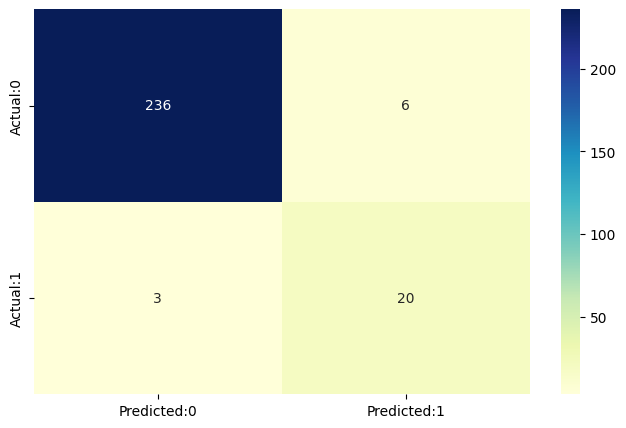

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

### 3.1.2 **Cross** Validating the model

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have features X and target variable y

# Create a logistic regression model
logreg_model = LogisticRegression()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(logreg_model, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96698113 0.96698113 0.97169811 0.98113208 0.95734597]
Mean accuracy: 0.968827684878834


## 3.2 KNN

###3.2.1 Splitting, Training and Fitting the model

In [68]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = African_crisis[['banking_crisis']]
y = African_crisis['systemic_crisis']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

### 3.2.1 Checking the accuracy of the model

In [69]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9811320754716981


### 3.2.2 Finding optimal K Value and plotting the values

In [70]:
#optimal K

n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred_knn,y_test),2))
    scores.append(round(accuracy_score(y_pred_knn,y_test),2))

Accuracy for k= 1 is: 0.98
Accuracy for k= 2 is: 0.98
Accuracy for k= 3 is: 0.98
Accuracy for k= 4 is: 0.98
Accuracy for k= 5 is: 0.98
Accuracy for k= 6 is: 0.98
Accuracy for k= 7 is: 0.98
Accuracy for k= 8 is: 0.98
Accuracy for k= 9 is: 0.98
Accuracy for k= 10 is: 0.98
Accuracy for k= 11 is: 0.98
Accuracy for k= 12 is: 0.98
Accuracy for k= 13 is: 0.98
Accuracy for k= 14 is: 0.98
Accuracy for k= 15 is: 0.98
Accuracy for k= 16 is: 0.98
Accuracy for k= 17 is: 0.98
Accuracy for k= 18 is: 0.98
Accuracy for k= 19 is: 0.98
Accuracy for k= 20 is: 0.98
Accuracy for k= 21 is: 0.98
Accuracy for k= 22 is: 0.98
Accuracy for k= 23 is: 0.98
Accuracy for k= 24 is: 0.98
Accuracy for k= 25 is: 0.98
Accuracy for k= 26 is: 0.98
Accuracy for k= 27 is: 0.98
Accuracy for k= 28 is: 0.98
Accuracy for k= 29 is: 0.98


Text(0, 0.5, 'Testing Accuracy')

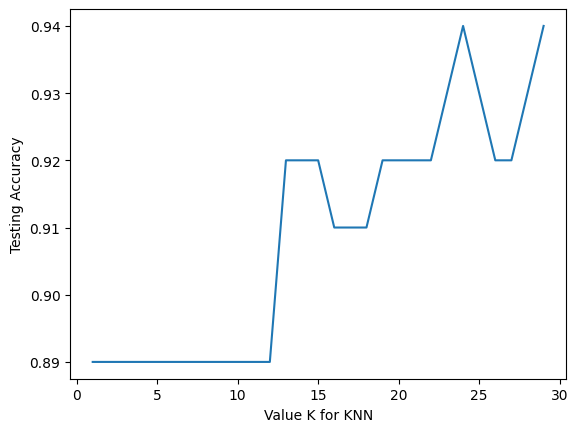

In [56]:
#Optimal K Value Plot
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

### 3.2.3 Cross Validating the Model

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming you have features X and target variable y

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(knn_model, x, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.86320755 0.92924528 0.93396226 0.9245283  0.92890995]
Mean accuracy: 0.9159706697666101


#4.0 Summary




## 4. 1 Logistic Regression Analysis
The logistics regression model returned an accuracy of 97% in predicting systemic crisis. Banking crisis had the highest correlation value of any value varaiable and was used as the main predictor variable. Using other combination feature combination when banking crisis feature is exluded returned lower accuracy value and vise versa.

The confusion matrix also shows the model returned three true negative result and six false postive results and the of the case of an systemic, a false negative result can be detrimental which is less in this model.

## 4. 2 KNN
Simiiar to the reression analysis, the KNN model returned 98% accuracy value when banking crisis is used as the sole predictor value in predicting systemic crisis.